## Classifying the Emotions of Turkish Music based on Trends in the Characteristics of Songs

Music is a part of our daily lives and also influences our emotions. From this, the question arises, how can a song’s main emotion be classified to make better suggestions for individuals?

In this project, we will use Mehmet Bilal Er's data set “Turkish Music Emotion Dataset Data Set” to classify songs into 4 emotions: Relaxed, Happy, Sad, and Angry.
To begin, some important variables in our classification are defined below:
* RMS Energy Mean: power of sound systems
* Low Energy Mean: percentage of frames with less energy than usual
* Fluctuation Mean: change in tempo
* Tempo Mean: speed performed
* Roughness Mean: musical dissonance
* Zero-crossing Rate Mean: times the waveform crosses zero
* Attack Time Mean: peaks passed through the compressor
* Roll-off Mean: limits of bass and treble frequencies
* Event Density Mean: compactness of events between beats
* Pulse Clarity Mean: simplicity of song's rhythm
* Brightness Mean: pitch of song
* Spectral Centroid Mean: frequency-weighted sum normalized by unweighted sum
* Spectral Spread Mean: standard deviation of spectral centroid
* Spectral Skewness Mean: strength of high and low harmonics
* Spectral Kurtosis Mean: flatness of the spectrum around centroid
* Spectral Flatness Mean: ratio of the geometric to arithmetic mean of spectrum
* Entropy of Spectrum Mean: peakiness of spectrum
* Harmonic Change Detection Function Mean: key and chord transitions

We will be classifying the emotion of music based on the above variables. We chose a large number of predictor variables to maximize our prediction accuracy. We chose predictors that are means of each characteristic for consistency. We also chose predictors that all display some pattern, such as the ones shown in the first three graphs below, since these are more likely useful predictors. The last graph displays ambiguity, leading to one of the variables being discarded.

First, we will read in the data and rename the columns to make the variables more readable. Next, we will split the data into a training set and a testing set (strat = 0.8). We will then build our K-nearest neighbour model by first cross-validating to find the optimal k-value and testing our model on our testing data. Lastly, we will visualize the results using a scatter plot with color as emotion for every impactful predictor.

We expect to build a robust model that can accurately predict a listener’s emotional response given a song’s characteristics. Many music-sharing websites often group songs together via genre to create auto-generated playlists. Our model could provide an alternative grouping method more focused on matching songs' emotions. Additionally, this can be used for listeners to quickly find songs that fit their desired mood. In the future, this project could lead to questioning which primary emotions should be used to categorize any given song. Lastly, this project may raise the question of whether our model of categorizing a song's emotion is unique to Turkish music or generalizable across cultures.




In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
turkish_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00638/Acoustic%20Features.csv")
colnames(turkish_data) <- c("Class", "RMS_Energy_Mean", "Low_Energy_Mean", "Fluctuation_Mean", "Tempo_Mean", 
                            "MFCC_Mean1", "MFCC_Mean2", "MFCC_Mean3", "MFCC_Mean4", "MFCC_Mean5", "MFCC_Mean6",
                            "MFCC_Mean7", "MFCC_Mean8", "MFCC_Mean9", "MFCC_Mean10", "MFCC_Mean11", "MFCC_Mean12",
                            "MFCC_Mean13", "Roughness_Mean", "Roughness_Slope", "Zero_Crossing_Rate_Mean",
                            "Attack_Time_Mean", "Attack_Time_Slope", "Roll_Off_Mean", "Event_Density_Mean", "Pulse_Clarity_Mean",
                            "Brightness_Mean", "Spectral_Centroid_Mean", "Spectral_Spread_Mean", "Spectral_Skewness_Mean",
                            "Spectral_Kurtosis_Mean", "Spectral_Flatness_Mean", "Entropy_of_Spectrum_Mean", "Chromagram_Mean1",
                            "Chromagram_Mean2", "Chromagram_Mean3", "Chromagram_Mean4", "Chromagram_Mean5", "Chromagram_Mean6",
                            "Chromagram_Mean7", "Chromagram_Mean8", "Chromagram_Mean9", "Chromagram_Mean10", "Chromagram_Mean11",
                            "Chromagram_Mean12", "Harmonic_Change_Detection_Function_Mean", "Harmonic_Change_Detection_Function_Std",
                            "Harmonic_Change_Detection_Function_Slope", "Harmonic_Change_Detection_Function_Period_Freq", 
                            "Harmonic_Change_Detection_Function_Period_Amp", "Harmonic_Change_Detection_Function_Period_Entropy")
head(turkish_data)

Rows: 400 Columns: 51
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (50): _RMSenergy_Mean, _Lowenergy_Mean, _Fluctuation_Mean, _Tempo_Mean, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Class,RMS_Energy_Mean,Low_Energy_Mean,Fluctuation_Mean,Tempo_Mean,MFCC_Mean1,MFCC_Mean2,MFCC_Mean3,MFCC_Mean4,MFCC_Mean5,⋯,Chromagram_Mean9,Chromagram_Mean10,Chromagram_Mean11,Chromagram_Mean12,Harmonic_Change_Detection_Function_Mean,Harmonic_Change_Detection_Function_Std,Harmonic_Change_Detection_Function_Slope,Harmonic_Change_Detection_Function_Period_Freq,Harmonic_Change_Detection_Function_Period_Amp,Harmonic_Change_Detection_Function_Period_Entropy
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,⋯,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,⋯,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,⋯,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,⋯,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,⋯,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
relax,0.137,0.510,7.664,116.044,2.313,-0.082,0.365,0.033,-0.136,⋯,0.064,0.391,0.102,0.000,0.280,0.240,0.355,1.682,0.662,0.958


In [3]:
turkish_split <- initial_split(turkish_data, prop = 0.8, strata = Class)
turkish_training <- training(turkish_split)
turkish_testing <- training(turkish_split)

In [4]:
turkish_table <- turkish_training |>
    select(Class, RMS_Energy_Mean, Low_Energy_Mean, Fluctuation_Mean, Tempo_Mean, Roughness_Mean, Zero_Crossing_Rate_Mean,
           Attack_Time_Mean, Roll_Off_Mean, Event_Density_Mean, Pulse_Clarity_Mean, Brightness_Mean, 
           Spectral_Centroid_Mean, Spectral_Spread_Mean, Spectral_Skewness_Mean, Spectral_Kurtosis_Mean, 
           Spectral_Flatness_Mean, Entropy_of_Spectrum_Mean, Harmonic_Change_Detection_Function_Mean) |>
    group_by(Class) |>
    summarise_all("mean")
turkish_table

Class,RMS_Energy_Mean,Low_Energy_Mean,Fluctuation_Mean,Tempo_Mean,Roughness_Mean,Zero_Crossing_Rate_Mean,Attack_Time_Mean,Roll_Off_Mean,Event_Density_Mean,Pulse_Clarity_Mean,Brightness_Mean,Spectral_Centroid_Mean,Spectral_Spread_Mean,Spectral_Skewness_Mean,Spectral_Kurtosis_Mean,Spectral_Flatness_Mean,Entropy_of_Spectrum_Mean,Harmonic_Change_Detection_Function_Mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
angry,0.1555625,0.5349500,5.619300,131.2752,680.5894,828.1131,0.0226875,5678.740,3.519300,0.2542125,0.4398250,2553.460,3090.203,1.773813,6.294025,0.0487625,0.8727875,0.2808500
happy,0.1477875,0.5507875,7.696662,124.8433,709.6458,1607.1039,0.0267000,6859.667,3.718738,0.4081875,0.5490000,3175.068,3331.153,1.384600,4.438125,0.0553875,0.9048375,0.3513500
relax,0.1189750,0.5538125,7.757150,112.4685,362.1078,668.2439,0.0349375,5439.057,1.761788,0.1730875,0.3577625,2335.241,3077.437,2.073688,8.171912,0.0456500,0.8521750,0.3361625
sad,0.1162000,0.5627750,7.460513,124.7171,347.7799,890.4334,0.0388375,4733.665,2.208950,0.1716750,0.3963375,2251.814,2791.110,2.215562,10.382162,0.0452750,0.8614875,0.3425375


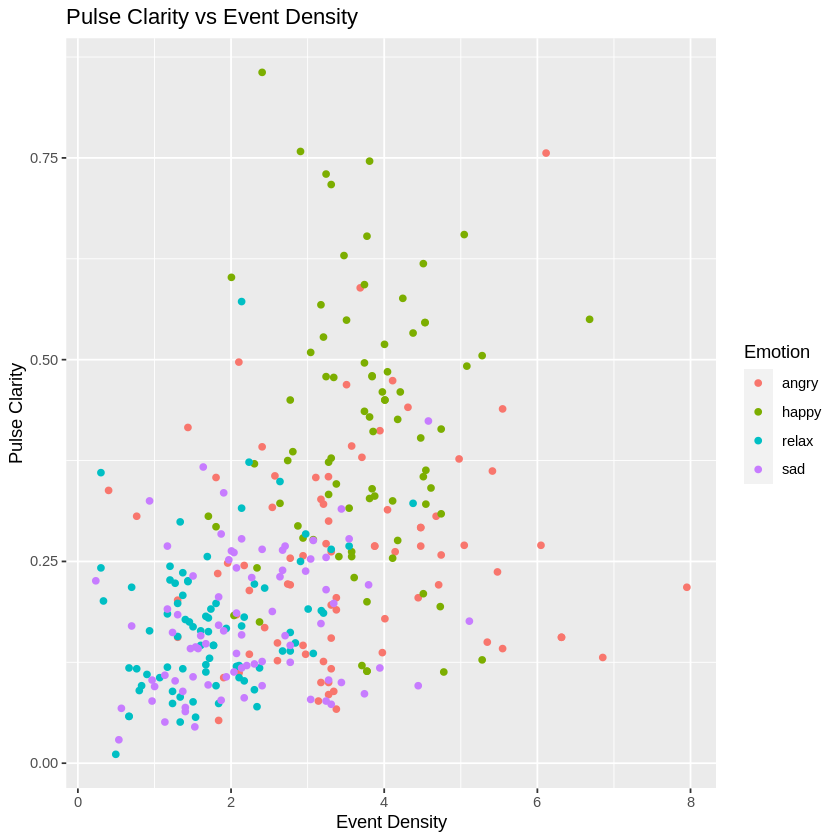

In [5]:
options(repr.plot.width = 7, repr.plot.height = 7)

pulseclarity_vs_eventdensity_plot <- ggplot(turkish_training, aes(x = Event_Density_Mean, y = Pulse_Clarity_Mean, color = Class)) +
    geom_point() + 
    labs(x = "Event Density", y = "Pulse Clarity", color = "Emotion") +
    ggtitle("Pulse Clarity vs Event Density") 
pulseclarity_vs_eventdensity_plot

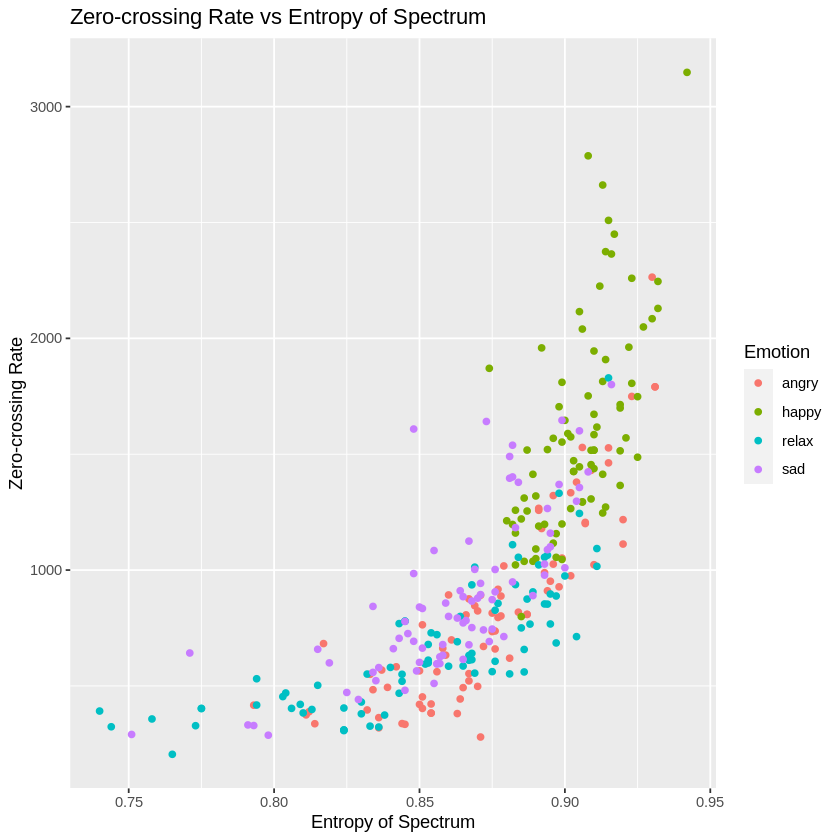

In [6]:
zerocrossingrate_vs_entropyofspectrum_plot <- ggplot(turkish_training, aes(x = Entropy_of_Spectrum_Mean, y = Zero_Crossing_Rate_Mean, color = Class)) +
    geom_point() +
    labs(x = "Entropy of Spectrum", y = "Zero-crossing Rate", color = "Emotion") +
    ggtitle("Zero-crossing Rate vs Entropy of Spectrum")
zerocrossingrate_vs_entropyofspectrum_plot

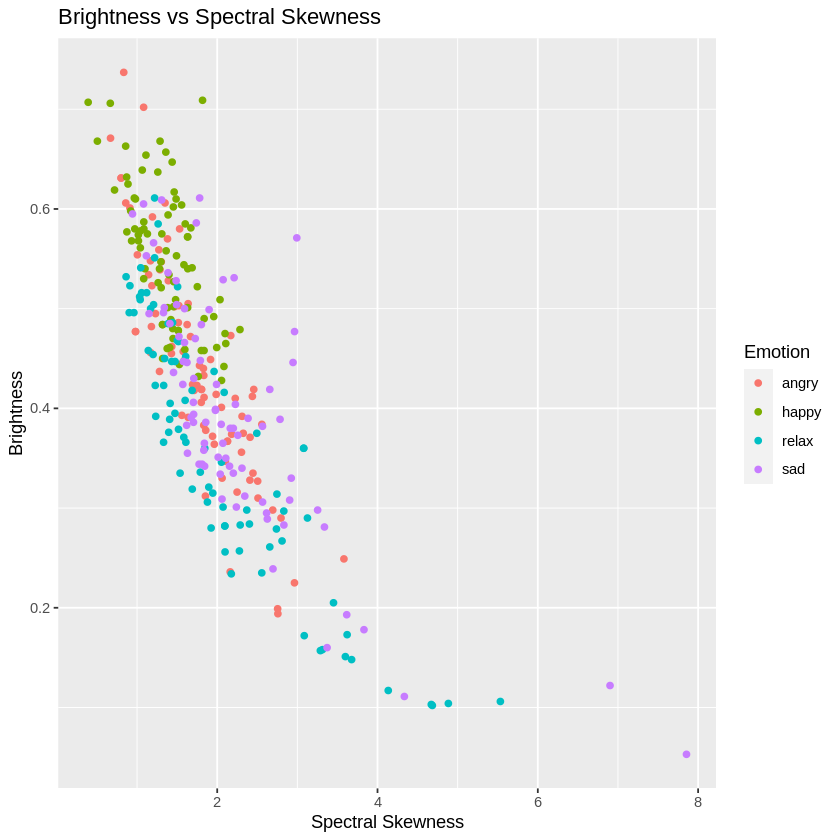

In [7]:
tempo_vs_attacktime_plot <- ggplot(turkish_training, aes(x = Spectral_Skewness_Mean, y = Brightness_Mean, color = Class)) +
                geom_point() +
                labs(x = "Spectral Skewness", y = "Brightness", color = "Emotion") +
                ggtitle("Brightness vs Spectral Skewness")
tempo_vs_attacktime_plot

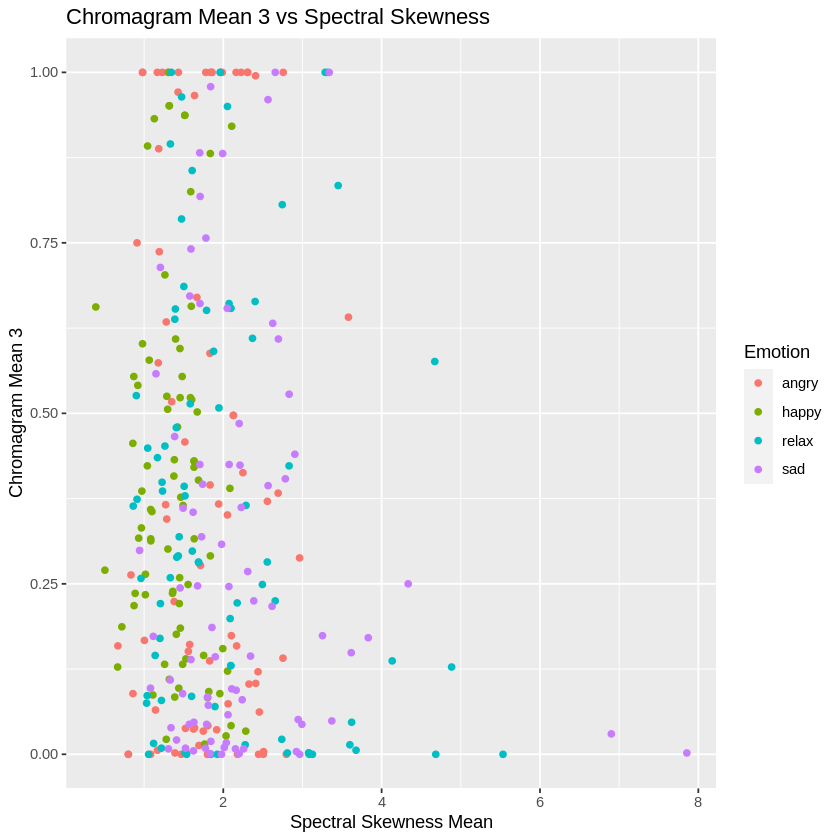

In [8]:
chromagrammean3_vs_spectralskewness_plot <- ggplot(turkish_training, aes(x = Spectral_Skewness_Mean, y = Chromagram_Mean3, color = Class)) +
                geom_point() +
                    labs(x = "Spectral Skewness Mean", y = "Chromagram Mean 3", color = "Emotion") +
                    ggtitle("Chromagram Mean 3 vs Spectral Skewness")
chromagrammean3_vs_spectralskewness_plot